In [1]:
# Import required modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix, classification_report

Loading the dataset

In [2]:
data = load_breast_cancer()

Checking the dictionary keys, in order to create the dataframe

In [3]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Now we create the dataframe with the relevant information in the data dictionary

In [4]:
df = pd.DataFrame(data=data.data, columns=data.feature_names)

df['target'] = data.target

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Veryfiying the data types, we see all the features are numerical including the target variable.

In [5]:
df.info() #to get the information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


Now I verify the null values, finding that the dataset does not have null values and is ready to work.

In [7]:
df.isna().sum() # to check null values

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

I noticed that the target variable is imbalanced. Also I reverted the order to make malign cancer as 1 and being cancer as 0

In [8]:
df['target'] = 1-df['target']

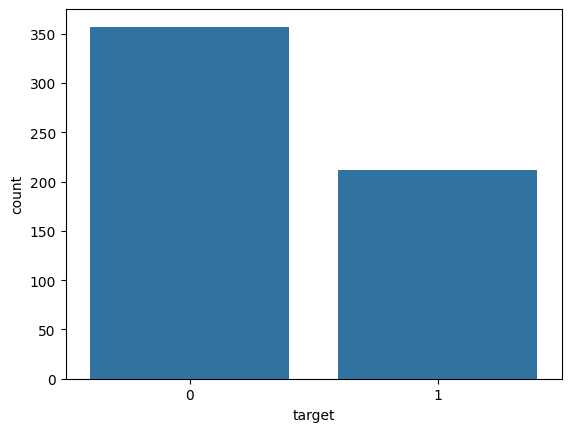

In [9]:
sns.countplot(x=df['target'])
plt.show()

No we split the dataset in training and testing datasets

In [10]:
x = df.drop(columns='target')
y = df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
len(df.columns)

31

In [12]:
selector = SelectKBest(k=15)

X_train_selected = selector.fit_transform(x_train, y_train)

X_test_selected = selector.transform(x_test)

In [13]:
features = selector.get_support()
features

array([ True, False,  True,  True, False,  True,  True,  True, False,
       False,  True, False,  True,  True, False, False, False, False,
       False, False,  True, False,  True,  True, False,  True,  True,
        True, False, False])

In [26]:
selected_features = x_train.columns[features]
selected_features


Index(['mean radius', 'mean perimeter', 'mean area', 'mean compactness',
       'mean concavity', 'mean concave points', 'radius error',
       'perimeter error', 'area error', 'worst radius', 'worst perimeter',
       'worst area', 'worst compactness', 'worst concavity',
       'worst concave points'],
      dtype='object')

Now I scale the training and testing data

In [14]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

In [15]:
param_grid = {
                'hidden_layer_sizes':[(100,), (64, 32)],  
              'solver':['adam', 'sgd'], 
              'alpha':[0.001, 0.0001],
              'learning_rate':['constant', 'adaptive'],
              'max_iter': [200, 1000, 2000]
}

model = MLPClassifier()

clf = GridSearchCV(model, param_grid, cv=5, scoring='f1')

In [16]:
clf.fit(X_train_scaled, y_train)

c:\Users\juan_\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\juan_\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\juan_\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\juan_\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the opti

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'alpha': [0.001, 0.0001],
                         'hidden_layer_sizes': [(100,), (64, 32)],
                         'learning_rate': ['constant', 'adaptive'],
                         'max_iter': [200, 1000, 2000],
                         'solver': ['adam', 'sgd']},
             scoring='f1')

In [17]:
print(clf.best_estimator_)

MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=2000)


In [18]:
clf.best_params_

{'alpha': 0.0001,
 'hidden_layer_sizes': (64, 32),
 'learning_rate': 'constant',
 'max_iter': 2000,
 'solver': 'adam'}

In [19]:
clf.best_score_

0.9373783079665433

In [20]:
X_train_scaled.shape

(455, 15)

In [21]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC



ann = Sequential()
ann.add(Dense(units=100, activation='relu', input_shape = (X_train_scaled.shape[1],)))
ann.add(Dropout(0.2))
ann.add(Dense(units=50, activation='relu'))
ann.add(Dense(units= 1, activation='sigmoid'))

ann.compile(optimizer=Adam(learning_rate= 0.0001), 
            loss='binary_crossentropy', 
            metrics=['accuracy', AUC(name='auc')])



c:\Users\juan_\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
history = ann.fit(X_train_selected, y_train, epochs=200, validation_data=(X_test_selected, y_test))

Epoch 1/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.4898 - auc: 0.5098 - loss: 21.9992 - val_accuracy: 0.3772 - val_auc: 0.5775 - val_loss: 5.1226
Epoch 2/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4757 - auc: 0.5052 - loss: 21.9382 - val_accuracy: 0.3947 - val_auc: 0.8803 - val_loss: 2.4855
Epoch 3/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4824 - auc: 0.4942 - loss: 21.6648 - val_accuracy: 0.3860 - val_auc: 0.7183 - val_loss: 3.7013
Epoch 4/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4807 - auc: 0.4939 - loss: 18.0782 - val_accuracy: 0.4211 - val_auc: 0.8310 - val_loss: 2.6756
Epoch 5/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5788 - auc: 0.6134 - loss: 14.5380 - val_accuracy: 0.8333 - val_auc: 0.9787 - val_loss: 0.5300
Epoch 6/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5827 - auc: 0.6131 - loss: 13.3913 - val_accuracy: 0.9211 - val_auc: 0.9749 - val_loss: 0.1948
Epoch 7/200
15/15 ━━━━━━━━━━━━━━━━

In [23]:
# Final Training Metrics
final_train_loss = history.history['loss'][-1]
final_train_accuracy = history.history['accuracy'][-1]
final_train_auc = history.history['auc'][-1]

# Final Validation Metrics
final_val_loss = history.history['val_loss'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]
final_val_auc = history.history['val_auc'][-1]

# Print the final metrics
print(f"Final Training Loss: {final_train_loss}")
print(f"Final Training Accuracy: {final_train_accuracy}")
print(f"Final Training AUC: {final_train_auc}")
print("--"*20)
print(f"Final Validation Loss: {final_val_loss}")
print(f"Final Validation Accuracy: {final_val_accuracy}")
print(f"Final Validation AUC: {final_val_auc}")


Final Training Loss: 0.6088145971298218
Final Training Accuracy: 0.89670330286026
Final Training AUC: 0.9206148386001587
----------------------------------------
Final Validation Loss: 0.09535284340381622
Final Validation Accuracy: 0.9649122953414917
Final Validation AUC: 0.9954143166542053


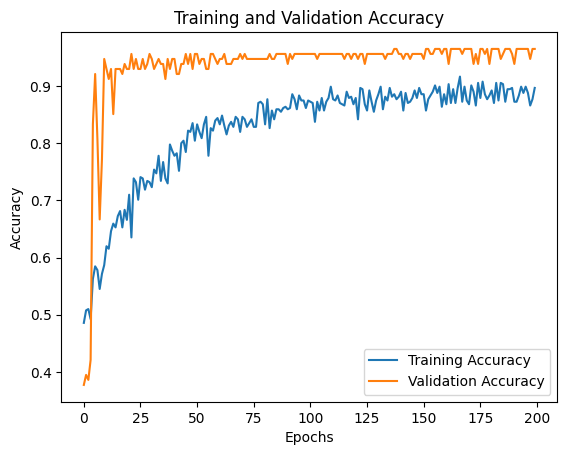

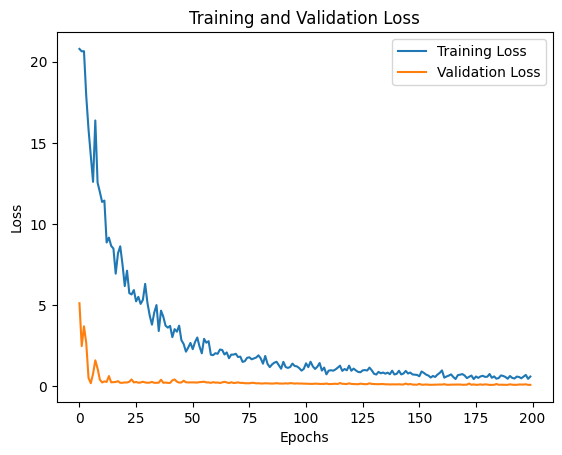

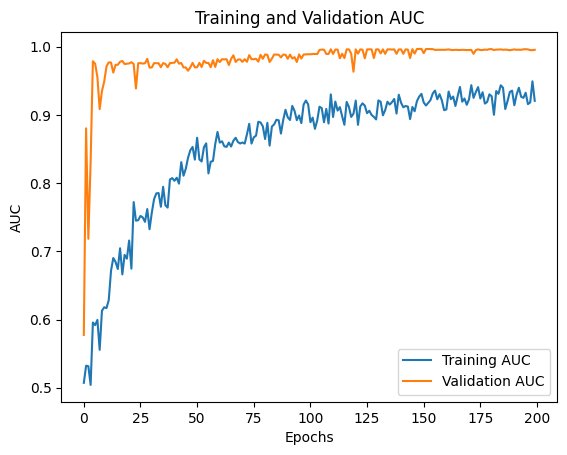

In [24]:

training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_auc = history.history['auc']
validation_auc = history.history['val_auc']

plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

plt.plot(training_auc, label='Training AUC')
plt.plot(validation_auc, label='Validation AUC')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.title('Training and Validation AUC')
plt.legend()
plt.show()

In [25]:
ann.save('cancermodel.h5')

In [27]:
import pickle
with(open('scaler.pkl', 'wb')) as file:
    pickle.dump(scaler, file)    